In [3]:
from sklearn.decomposition import PCA

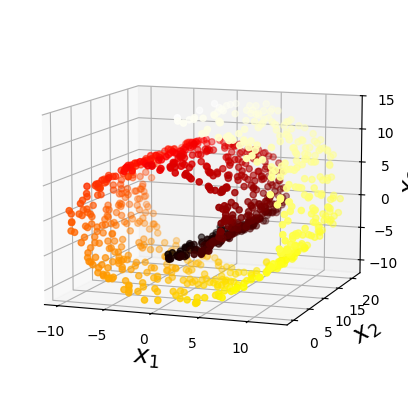

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_swiss_roll

X, y = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

plt.show()

In [5]:
# Aplicar PCA para reducir a 2 componentes principales
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Información sobre la varianza explicada
# Imprimir la varianza explicada por los dos primeros componentes en porcentaje
explained_variance = pca.explained_variance_ratio_
for i, var in enumerate(explained_variance):
    print(f"Componente Principal {i + 1}: {var * 100:.2f}% de la varianza explicada")


Componente Principal 1: 40.78% de la varianza explicada
Componente Principal 2: 30.20% de la varianza explicada


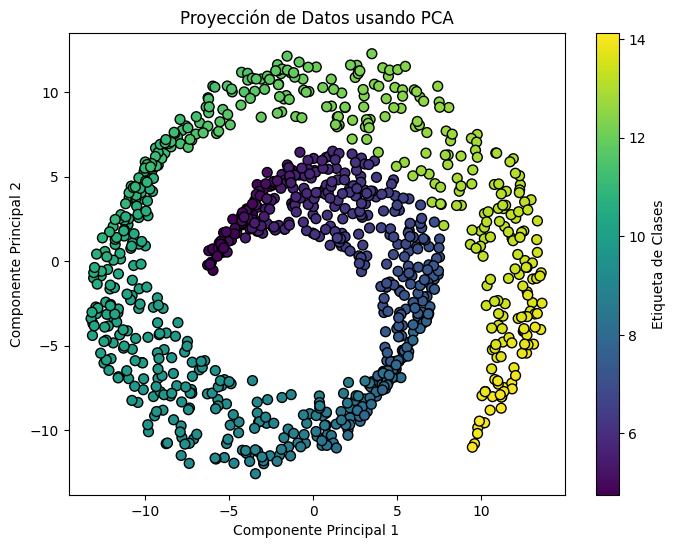

In [6]:
# Graficar los datos proyectados en el nuevo subespacio de 2D
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Proyección de Datos usando PCA')
plt.colorbar(label='Etiqueta de Clases')
plt.show()

<a id="Aprendizaje de Variedades"></a>
## <u>Aprendizaje de Variedades</u>

<a id="t-SNE"></a>
### <u>t-SNE</u>

- t-SNE proyecta puntos en un espacio de alta dimensionalidad a una dimensión más baja de manera que las distancias entre los puntos permanezcan casi iguales.

- A diferencia del PCA, t-SNE no es una proyección lineal. Utiliza las relaciones locales entre puntos para crear un mapeo de baja dimensionalidad, lo que le permite capturar estructuras no lineales.
- t-SNE crea una distribución de probabilidad utilizando la distribución Gaussiana que define las relaciones entre los puntos en el espacio de alta dimensionalidad.
- t-SNE utiliza la distribución t de Student para recrear la distribución de probabilidad en el espacio de baja dimensionalidad.
- t-SNE optimiza las incrustaciones directamente usando descenso por gradiente. Sin embargo, la función de costo no es convexa, lo que significa que existe el riesgo de quedarse atascado en mínimos locales. Esto tiene una consecuencia importante: t-SNE es no determinista. Al ejecutarlo varias veces, podemos obtener resultados diferentes en cada ocasión.

t-SNE utiliza “vecinos estocásticos”, lo que significa que no hay una línea clara que determine qué puntos son vecinos de otros. Esta falta de bordes claros permite que t-SNE tome en cuenta tanto la estructura global como la local de manera natural. La estructura local es más importante que la global, pero los puntos lejanos no se ignoran por completo, lo que permite una reducción de dimensionalidad "bien equilibrada".

#### <u>Algoritmo de t-SNE</u>:

<b>Paso 1</b>: En el espacio de alta dimensionalidad, crear una distribución de probabilidad que dicte las relaciones entre varios puntos vecinos.

<b>Paso 2</b>: Luego trata de recrear un espacio de baja dimensionalidad que siga dicha distribución de probabilidad lo mejor posible.

#### <u>¿Por qué necesitamos t-SNE?</u>

El PCA no puede capturar dependencias no lineales. Por ejemplo, PCA no sería capaz de "desenrollar" la siguiente estructura.


In [7]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
X_reduced = tsne.fit_transform(X)

c:\Users\fbien.DESKTOP-6FMEAR7\Desktop\intro_machine_learning\env\lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.006s...
[t-SNE] Computed neighbors for 1000 samples in 0.048s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 2.963165
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.386364
[t-SNE] KL divergence after 300 iterations: 0.724011


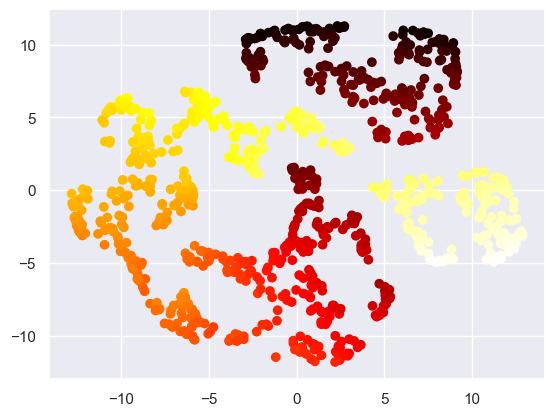

In [8]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

#ax = sns.scatterplot(x=X[:, 0], y=X[:, 1], hue = y)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=plt.cm.hot)